In [1]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
import os
import librosa
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Loading all labels and embeddings.

In [ ]:
train_embeddings = np.load('/content/drive/MyDrive/AD-Blocker Project/embeddings/train_embeddings.npy')
val_embeddings = np.load('/content/drive/MyDrive/AD-Blocker Project/embeddings/val_embeddings.npy')
test_embeddings = np.load('/content/drive/MyDrive/AD-Blocker Project/embeddings/test_embeddings.npy')
train_labels = np.load('/content/drive/MyDrive/AD-Blocker Project/embeddings/train_labels.npy')
val_labels = np.load('/content/drive/MyDrive/AD-Blocker Project/embeddings/val_labels.npy')
test_labels = np.load('/content/drive/MyDrive/AD-Blocker Project/embeddings/test_labels.npy')

Uncomment to apply the training only on ads and podcasts without transitions.

In [ ]:
# """
# How to apply the model only on ads and podcasts
# """

#print(train_embeddings.shape)
# for l in train_labels:
#   print(l)

# Define the indices of the chunk to delete
start_index = 153
end_index = 223

# Select rows before and after the chunk to keep
rows_to_keep_before = train_embeddings[:start_index]
rows_to_keep_after = train_embeddings[end_index + 1:]

# Concatenate the rows back together
updated_train_embeddings = np.vstack((rows_to_keep_before, rows_to_keep_after))

#slice train labels
index_before = train_labels[:start_index]
index_after = train_labels[end_index + 1:]
updated_train_labels = np.concatenate((index_before, index_after))

Change to Validation and Testing Labels in oder to test and validate only in ads and podcasts without transitions.

In [ ]:
# for l in val_labels:
#   print(l)
# start_index = 9
# end_index = 16

# Select rows before and after the chunk to keep
# rows_to_keep_before = val_embeddings[:start_index]
# rows_to_keep_after = val_embeddings[end_index + 1:]

# # Concatenate the rows back together
# updated_val_embeddings = np.vstack((rows_to_keep_before, rows_to_keep_after))

#slice val labels
# index_before = val_labels[:start_index]
# index_after = val_labels[end_index + 1:]
# updated_val_labels = np.concatenate((index_before, index_after))
# val_labels[start_index:end_index]=0
# val_labels[12]=3


In [ ]:
start_index = 9
end_index = 16
val_labels[start_index:end_index]=0
val_labels[12]=3

In [ ]:
# # Select rows before and after the chunk to keep
# rows_to_keep_before = test_embeddings[:start_index]
# rows_to_keep_after = test_embeddings[end_index + 1:]

# # Concatenate the rows back together
# updated_test_embeddings = np.vstack((rows_to_keep_before, rows_to_keep_after))

#slice val labels
# index_before = test_labels[:start_index]
# index_after = test_labels[end_index + 1:]
# updated_test_labels = np.concatenate((index_before, index_after))

In [ ]:
# for l in test_labels:
#   print(l)
start_index = 11
end_index = 16

#convert labels class to 0
test_labels[start_index:end_index]=0



Corrections of the embeddings and labels for the false transitions.

In [ ]:

# """
# How to correct the labels of the ad_entrance and as_exit
# """

# print(train_embeddings.shape)
# print(train_labels.shape)

#train_labels[154]=3
#train_labels[166]=3
#train_labels[198]=3
val_labels[12]=3

In [ ]:
def train_svm_model(embeddings, labels):
    """
    Train an SVM model using the embeddings and labels.

    Parameters:
    - embeddings: List of embeddings (list of arrays).
    - labels: List of corresponding labels.

    Returns:
    - model: Trained SVM model.
    """
    # Convert the list of arrays into a 3D NumPy array
    # embeddings_array = np.array(embeddings).flatten()

    # Train SVM model
    model = SVC(kernel='linear')
    model.fit(embeddings, labels)
    return model

In [ ]:
# Train SVM model
#print(train_embeddings)
model = train_svm_model(updated_train_embeddings, updated_train_labels)

In [ ]:
# Validate model
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

val_predictions = model.predict(val_embeddings)
val_accuracy = accuracy_score(val_labels, val_predictions)
#val_accuracy = model.score(val_embeddings, val_labels)
print("Validation Accuracy:", val_accuracy)

Validation Accuracy: 0.95


In [ ]:
# Test model
test_predictions = model.predict(test_embeddings)
test_accuracy = accuracy_score(test_labels, test_predictions)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.9139784946236559


# Demo

In [ ]:
test_ad = "/content/drive/MyDrive/AD-Blocker Project/test/ad/ad_sample4.wav"
audio_data_ad, sample_rate = load_audio(test_ad)
embedding_ad = extract_audio_embedding(audio_data_ad, sample_rate)
test_predictions = model.predict(embedding_ad)

test_podcast1 =  "/content/drive/MyDrive/AD-Blocker Project/test/ad/podcast_sample4.wav"
audio_data_p1,sample_rate = load_audio(test_podcast1)
embedding_p1 = extract_audio_embedding(audio_data_p1, sample_rate)
test_predictions = model.predict(embedding_p1)

test_podcast2 =  "/content/drive/MyDrive/AD-Blocker Project/test/ad/podcast_sample5.wav"
audio_data_p2,sample_rate = load_audio(test_podcast2)
embedding_p2 = extract_audio_embedding(audio_data_p2, sample_rate)
test_predictions = model.predict(embedding_p2)


KeyboardInterrupt: 

test_predictions
[3 0 0 3 3 3 0 3 3 3 0 3 3 3 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 0 3 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3]
test_labels
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3]
[[  6  10]
 [  6 164]]






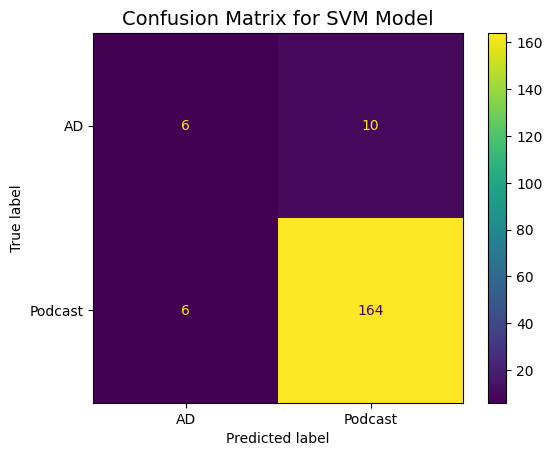

Confusion Matrix:
[[  6  10]
 [  6 164]]
True Positives (TP): 164
True Negatives (TN): 6
False Positives (FP): 10
False Negatives (FN): 6
Accuracy: 91.40%
Precision: 90.45%
Recall 0.91
F1 Score: 0.91
F2 Score for Test Set (favored towards recall): 0.96%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 3) is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 3) is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, fbeta_score
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Perform predictions on the test embeddings
test_predictions = model.predict(test_embeddings)
print ("test_predictions")
print (test_predictions)
print ("test_labels")
test_labels[16] = 3
print (test_labels)

# Calculate confusion matrix
conf_matrix = confusion_matrix(test_labels, test_predictions)
print (conf_matrix)
print("\n\n\n")
# Display confusion matrix for test set
cm_display_test = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["AD", "Podcast"])
cm_display_test.plot()
plt.title('Confusion Matrix for SVM Model',fontsize=14)
plt.show()

# Extract TP, TN, FP, FN from confusion matrix
TP = conf_matrix[1, 1]  # True Positives
TN = conf_matrix[1, 0]  # True Negatives
FP = conf_matrix[0, 1]  # False Positives
FN = conf_matrix[0, 0]  # False Negatives

# Calculate accuracy
accuracy = accuracy_score(test_labels, test_predictions)

# Calculate precision
#precision = precision_score(test_labels, test_predictions, average='weighted')
precision = precision_score(test_labels, test_predictions, pos_label=3, average='weighted')

# Calculate recall
# recall = recall_score(test_labels, test_predictions, average='weighted')
recall = recall_score(test_labels, test_predictions, pos_label=3, average='weighted')



# Calculate F1-score
f1 = f1_score(test_labels, test_predictions, average='weighted')


# Display results
print("Confusion Matrix:")
print(conf_matrix)
print("True Positives (TP):", TP)
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)
accuracy_percentage = "{:.2f}%".format(accuracy * 100)
print("Accuracy:", accuracy_percentage)
precision_percentage = "{:.2f}%".format(precision * 100)
print("Precision:", precision_percentage)
recall_formated = "{:.2f}".format(recall)
print("Recall", recall_formated)
f1_formated = "{:.2f}".format(f1)
print("F1 Score:", f1_formated)

# Calculate F-beta score for test set (favored towards recall)
fbeta_test = fbeta_score(test_labels, test_predictions, beta=2, pos_label=3)
fbeta_percentage = "{:.2f}%".format(fbeta_test)
print("F2 Score for Test Set (favored towards recall):", fbeta_percentage)

# next is not working

True Positives (TP) for Test: 6
True Negatives (TN) for Test: 164
False Positives (FP) for Test: 6
False Negatives (FN) for Test: 10


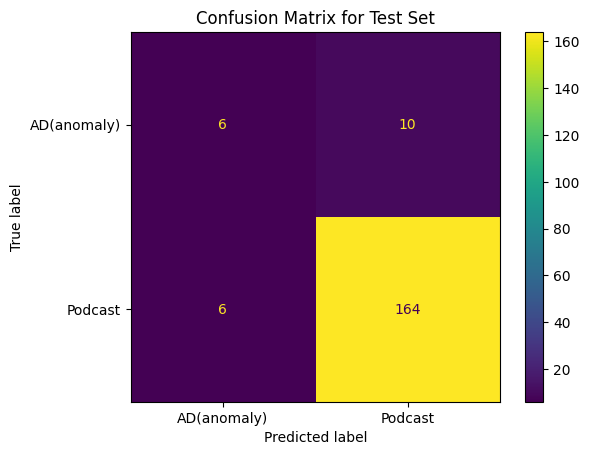

Accuracy for Test Set: 0.9139784946236559


ValueError: pos_label=1 is not a valid label. It should be one of [0, 3]

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict labels for the test embeddings using the trained SVM model
test_predictions = model.predict(test_embeddings)

# Calculate confusion matrix for test set
test_conf_matrix = confusion_matrix(test_labels, test_predictions)

# Extract TP, TN, FP, FN from confusion matrix
TP_test = test_conf_matrix[0, 0]  # Correctly predicted anomalies
TN_test = test_conf_matrix[1, 1]  # Correctly predicted normal instances
FP_test = test_conf_matrix[1, 0]  # Incorrectly predicted normal instances as anomalies
FN_test = test_conf_matrix[0, 1]  # Incorrectly predicted anomalies as normal instances

print("True Positives (TP) for Test:", TP_test)
print("True Negatives (TN) for Test:", TN_test)
print("False Positives (FP) for Test:", FP_test)
print("False Negatives (FN) for Test:", FN_test)

# Display confusion matrix for test set
cm_display_test = ConfusionMatrixDisplay(confusion_matrix=test_conf_matrix, display_labels=["AD(anomaly)", "Podcast"])
cm_display_test.plot()
plt.title('Confusion Matrix for Test Set')
plt.show()

# Calculate accuracy for test set
accuracy_test = accuracy_score(test_labels, test_predictions)
print("Accuracy for Test Set:", accuracy_test)

# Calculate precision for test set
precision_test = precision_score(test_labels, test_predictions)
print("Precision for Test Set:", precision_test)

# Calculate recall for test set
recall_test = recall_score(test_labels, test_predictions)
print("Recall for Test Set:", recall_test)

# Calculate F1-score for test set
f1_test = f1_score(test_labels, test_predictions)
print("F1 Score for Test Set:", f1_test)

# Calculate AUC score for test set
fpr_test, tpr_test, _ = roc_curve(test_labels, test_predictions)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curve for test set
plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Test Set')
plt.legend(loc="lower right")
plt.show()

# Display AUC score for test set
print("AUC Score for Test Set:", roc_auc_test)

#	**next** **is not working**

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Perform predictions on the validation embeddings
val_predictions = model.predict(val_embeddings)

# Calculate confusion matrix for validation set
val_conf_matrix = confusion_matrix(val_labels, val_predictions)

# Display confusion matrix for validation set
cm_display_val = ConfusionMatrixDisplay(confusion_matrix=val_conf_matrix, display_labels=["Podcast", "AD"])
cm_display_val.plot()
plt.title('Confusion Matrix for Validation Set')
plt.show()

# Calculate evaluation metrics for validation set
accuracy_val = accuracy_score(val_labels, val_predictions)
precision_val = precision_score(val_labels, val_predictions)
recall_val = recall_score(val_labels, val_predictions)
f1_val = f1_score(val_labels, val_predictions)

print("Validation Accuracy:", accuracy_val)
print("Validation Precision:", precision_val)
print("Validation Recall:", recall_val)
print("Validation F1 Score:", f1_val)

# Perform predictions on the test embeddings
test_predictions = model.predict(test_embeddings)

# Calculate confusion matrix for test set
test_conf_matrix = confusion_matrix(test_labels, test_predictions)

# Display confusion matrix for test set
cm_display_test = ConfusionMatrixDisplay(confusion_matrix=test_conf_matrix, display_labels=["Podcast", "AD"])
cm_display_test.plot()
plt.title('Confusion Matrix for Test Set')
plt.show()

# Calculate evaluation metrics for test set
accuracy_test = accuracy_score(test_labels, test_predictions)
precision_test = precision_score(test_labels, test_predictions)
recall_test = recall_score(test_labels, test_predictions)
f1_test = f1_score(test_labels, test_predictions)

print("Test Accuracy:", accuracy_test)
print("Test Precision:", precision_test)
print("Test Recall:", recall_test)
print("Test F1 Score:", f1_test)

# Calculate ROC curve and AUC score for test set
fpr_test, tpr_test, _ = roc_curve(test_labels, test_predictions)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curve for test set
plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Test Set')
plt.legend(loc="lower right")
plt.show()

print("AUC Score for Test Set:", roc_auc_test)

## ***Random Forest Classifier***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

In [ ]:
# train_labels[154]=3
# train_labels[166]=3
# train_labels[198]=3
val_labels[12]=3

In [ ]:
"""
How to apply the model only on ads and podcasts
"""

# #print(train_embeddings.shape)
# # for l in train_labels:
# #   print(l)

# # Define the indices of the chunk to delete
start_index = 153
end_index = 223

# # Select rows before and after the chunk to keep
rows_to_keep_before = train_embeddings[:start_index]
rows_to_keep_after = train_embeddings[end_index + 1:]

# # Concatenate the rows back together
updated_train_embeddings = np.vstack((rows_to_keep_before, rows_to_keep_after))

# #slice train labelsindex_before = train_labels[:start_index]
index_after = train_labels[end_index + 1:]
updated_train_labels = np.concatenate((index_before, index_after))

In [ ]:
start_index = 9
end_index = 16
val_labels[start_index:end_index]=0
val_labels[12]=3


In [ ]:
start_index = 11
end_index = 16

#convert labels class to 0
test_labels[start_index:end_index]=0

In [ ]:
clf = RandomForestClassifier(n_estimators=50, random_state=456)

# Train the Random Forest Classifier
#clf.fit(updated_train_embeddings,updated_train_labels)
clf.fit(updated_train_embeddings, updated_train_labels)

In [ ]:
# Predictions on validation data
val_predictions = clf.predict(val_embeddings)

# Calculate validation accuracy
val_accuracy = accuracy_score(val_labels, val_predictions)
print("Validation Accuracy:", val_accuracy)

In [ ]:
# Predictions on test data
test_predictions = clf.predict(test_embeddings)

# Calculate test accuracy
test_accuracy = accuracy_score(test_labels, test_predictions)
print("Test Accuracy:", test_accuracy)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, fbeta_score

# Perform predictions on the test embeddings
test_predictions = clf.predict(test_embeddings)

# Calculate confusion matrix
conf_matrix = confusion_matrix(test_labels, test_predictions)

# Display confusion matrix for test set
cm_display_test = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["AD", "Podcast"])
print("\n\n\n")
cm_display_test.plot()
plt.title('Confusion Matrix for Random Forest',fontsize=14)
plt.show()
print("\n\n\n")


# Extract TP, TN, FP, FN from confusion matrix
TP = conf_matrix[1, 1]  # True Positives
TN = conf_matrix[1, 0]  # True Negatives
FP = conf_matrix[0, 1]  # False Positives
FN = conf_matrix[0, 0]  # False Negatives

# Calculate accuracy
accuracy = accuracy_score(test_labels, test_predictions)
accuracy_percentage = "{:.2f}%".format(accuracy * 100)

# Calculate precision
precision = precision_score(test_labels, test_predictions, average='weighted')
precision_percentage = "{:.2f}%".format(precision * 100)

# Calculate recall
recall = recall_score(test_labels, test_predictions, average='weighted')
recall = "{:.2f}".format(recall)
# Calculate F1-score
f1 = f1_score(test_labels, test_predictions, average='weighted')
f1 = "{:.2f}".format(f1)


# Display results
print("Confusion Matrix:")
print(conf_matrix)
print("True Positives (TP):", TP)
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)
print("Accuracy:", accuracy_percentage)
print("Precision:", precision_percentage)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculate F-beta score for test set (favored towards recall)
fbeta_test = fbeta_score(test_labels, test_predictions, beta=2, pos_label=3)
fbeta_percentage = "{:.2f}%".format(fbeta_test)
print("F2 Score for Test Set (favored towards recall):", fbeta_percentage)


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # You can add more values to this list
    'random_state': [42, 123, 456]    # You can add more values to this list
}

# Initialize Random Forest Classifier
clf = RandomForestClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, scoring='accuracy')

# Perform grid search to find the best parameters
grid_search.fit(updated_train_embeddings, updated_train_labels)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_clf = grid_search.best_estimator_

# Predictions on validation data using the best model
val_predictions = best_clf.predict(val_embeddings)

# Calculate validation accuracy using the best model
val_accuracy = accuracy_score(val_labels, val_predictions)
print("Validation Accuracy with Best Model:", val_accuracy)

# Predictions on test data using the best model
test_predictions = best_clf.predict(test_embeddings)

# Calculate test accuracy using the best model
test_accuracy = accuracy_score(test_labels, test_predictions)
print("Test Accuracy with Best Model:", test_accuracy)

# Demo

In [ ]:
!pip install openl3
!pip install librosa

  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.4/323.4 kB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for openl3: filename=openl3-0.4.2-py2.py3-none-any.whl size=249327032 sha256=71c714c146609440f9a695bb353de738bdc5c52bd87c90c9545ebc23ac5c4326
  Stored in directory: /root/.cache/pip/wheels/d0/4d/0a/e57b1dc8ead91b3c5709d9de4f02d1cdd3a91f609a8f1c1062
  Created wheel for kapre: filename=kapre-0.3.7-py3-none-any.whl size=29603 sha256=a5d880aa66c08f0c547aa90ef5620837fd5b6958f88bc1163b137ae861010c04
  Stored in directory: /root/.cache/pip/wheels/3e/54/f9/37e9f36590a5431dc207f7dc0eb2e607ff8958d5728e45ef58
  Created wheel for resampy: filename=resampy-0.2.2-py3-none-any.whl size=320706 sha256=4d929065691372f269602fb054b07d0e8f8eb8ea30ccf049aaf2892a214c3a3b
  Stored in directory: /root

In [ ]:
# Import relevant libraries to work with files and with the operating system
import zipfile
import os

# Import relevant libraries for working with audio files as well as audio
# embedding
import librosa
import openl3

# Import relevant libraries for performing calculations and classification
import numpy as np
from sklearn.svm import SVC

In [ ]:
def load_audio(file_path):
    """
    Load an audio file and return the audio data and sample rate.

    Parameters:
    - file_path: The path to the audio file.

    Returns:
    - audio_data: The audio signal.
    - sample_rate: The sample rate of the audio file.
    """
    audio_data, sample_rate = librosa.load(file_path, sr=None)
    return audio_data, sample_rate

In [ ]:
def extract_audio_embedding(audio_data, sample_rate):
    """
    Extract audio embeddings using OpenL3.

    Parameters:
    - audio_data: The audio signal.
    - sample_rate: The sample rate of the audio file.

    Returns:
    - embedding: The audio embedding.
    """
    # Extract embeddings using OpenL3
    size = 512
    embedding, _ = openl3.get_audio_embedding(audio_data, sample_rate, content_type="music", embedding_size=size)

    # embedding, _ = openl3.get_audio_embedding(audio_data, sample_rate, content_type="music")
    flat_embedding = np.ravel(embedding)
    return flat_embedding

In [ ]:
def load_data(data_folder):
    """
    Load audio data and corresponding labels from a folder.

    Parameters:
    - data_folder: The path to the folder containing audio files.

    Returns:
    - embeddings: List of audio embeddings.
    - labels: List of corresponding labels.
    """
    embeddings = []
    labels = []
    class_labels = {}  # Dictionary to map class names to label indices
    label_index = 0
    #number_of_samples = 0  # try with only one sample'''


    for class_name in sorted(os.listdir(data_folder)):
        class_folder = os.path.join(data_folder, class_name)
        class_labels[class_name] = label_index
        for file_name in os.listdir(class_folder):
            file_path = os.path.join(class_folder, file_name)
            #number_of_samples += 1  # try with only one sample'''
            if file_name.endswith('.wav'):  # Process only WAV audio files
                duration = librosa.get_duration(path=file_path)
                if duration < 10.0:
                  print(file_name)
                  continue
                audio_data, sample_rate = load_audio(file_path)
                embedding = extract_audio_embedding(audio_data, sample_rate)
                embeddings.append(embedding)
                # embeddings.append(embedding.flatten()) #flatten 3d matrix into 2d matrix for svc
                labels.append(label_index)
            #if number_of_samples >= 1 :  # '''try with only one sample'''
              #break     # try with only one sample

        label_index += 1

In [ ]:


test_ad = "/content/drive/MyDrive/AD-Blocker Project/test/ad/ad_sample4.wav"

test_podcast1 =  "/content/drive/MyDrive/AD-Blocker Project/test/ad/podcast_sample4.wav"

test_podcast2 =  "/content/drive/MyDrive/AD-Blocker Project/test/ad/podcast_sample5.wav"

demo_folder= [test_podcast1, test_ad, test_podcast2]

In [ ]:

test_ad = "/content/drive/MyDrive/AD-Blocker Project/test/ad/ad_sample4.wav"
audio_data_ad, sample_rate = load_audio(test_ad)
embedding_ad = extract_audio_embedding(audio_data_ad, sample_rate)
test_predictions = model.predict(embedding_ad)

test_podcast1 =  "/content/drive/MyDrive/AD-Blocker Project/test/ad/podcast_sample4.wav"
audio_data_p1,sample_rate = load_audio(test_podcast1)
embedding_p1 = extract_audio_embedding(audio_data_p1, sample_rate)
test_predictions = model.predict(embedding_p1)

test_podcast2 =  "/content/drive/MyDrive/AD-Blocker Project/test/ad/podcast_sample5.wav"
audio_data_p2,sample_rate = load_audio(test_podcast2)
embedding_p2 = extract_audio_embedding(audio_data_p2, sample_rate)
test_predictions = model.predict(embedding_p2)


3/3 [==============================] - 53s 17s/step


ValueError: Expected 2D array, got 1D array instead:
array=[3.32172227 1.37077928 2.65570831 ... 1.5415349  2.49026561 3.01683688].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.